In [52]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import urllib.request
url = "https://raw.githubusercontent.com/tcollett/LensPop/master/lenses_Euclid.txt"
urllib.request.urlretrieve(url, "lenses_Euclid.txt")

('lenses_Euclid.txt', <http.client.HTTPMessage at 0x127247ba8>)

In [54]:
lenses_Euclid = pd.read_csv("lenses_Euclid.txt", skiprows=24, header=None, delimiter=' ')

In [55]:
with open("lenses_Euclid.txt") as myfile:
    head = [next(myfile) for x in range(24)]
print(head)

['#Lens population discoverable in the Euclid\n', '#\n', '#The population was forecast by T.Collett (ICG, Portsmouth) - please cite Collett (2015)\n', '#\n', '#Each line in the table represents a single lens. The table represnts 0.1 of the full sky (i.e. each lens should be weighted by A/4200, where A is the area of the survey in square degrees)\n', '#The columns in the table are:\n', '#------------------------------------\n', '#[0] zl, lens redshift \n', '#[1] zs, source redshift \n', '#[2] b, Einstein radius (arcseconds) \n', '#[3] sig_v, lens velocity dispersion (km/s) \n', '#[4] ql, lens flattening (1=circular, q=1-e) \n', '#[5] rl, lens half light radius (arcseconds) NB/ sersic index is 4\n', '#[6] lens VIS band magnitude\n', '#[7] xs, source x coordinate relative, 0 is lens centre (arcseconds) \n', '#[8] ys, source y coordinate relative, 0 is lens centre (arcseconds) \n', '#[9] qs, source flattening (1=circular, q=1-e) \n', '#[10] ps, source position angle (degrees)\n', '#[11] rs

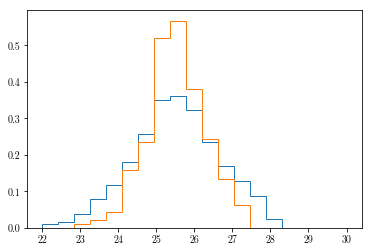

In [56]:
lenses_Euclid_sel = lenses_Euclid[(lenses_Euclid[1] > 0.) * (lenses_Euclid[1] < 20.) * (lenses_Euclid[11] < 10)]
lenses_Euclid_sel2 = lenses_Euclid[(lenses_Euclid[1] > 1.) * (lenses_Euclid[1] < 1.2) * (lenses_Euclid[11] < 0.2) * (lenses_Euclid[11] > 0.02)]

plt.hist(lenses_Euclid_sel[12], bins = np.linspace(22,30,20), histtype='step', normed=True);
plt.hist(lenses_Euclid_sel2[12], bins = np.linspace(22,30,20), histtype='step', normed=True);

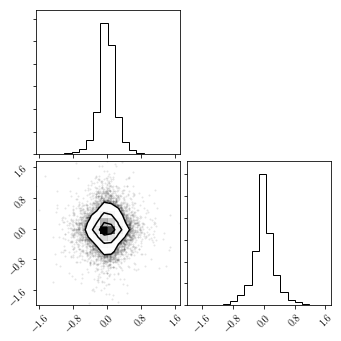

In [57]:
corner.corner(np.transpose([lenses_Euclid_sel[7], lenses_Euclid_sel[8]]));

In [60]:
sys.path.append("../simulation/")
from units import *

In [66]:
def sigma_v(M):
    sigma_0 = 117*Kmps
    M1 = 1.5e12*M_s/h
    gamma1 = 4.3
    gamma2 = 6.79
    return sigma_0*(M/M1)**gamma1/ ((1 + M/M1)**(gamma2 - gamma1))

In [67]:
sigma_v(1e13*M_s)/Kmps

1172.543949211647

In [84]:
from uncertainties import ufloat
from uncertainties import unumpy

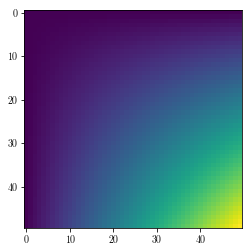

In [124]:
n_x = 50
n_y = 50

sigma_v_x = 2
sigma_v_y = 40

v_x_map = np.zeros([n_x, n_y])
v_y_map
sigma_v_map = np.zeros([n_x, n_y])

for i_x in range(n_x):
    for i_y in range(n_y):
        v_x = ufloat(i_x, sigma_v_x)
        v_y = ufloat(i_y, sigma_v_y)
        v_map[i_x, i_y] = (v_x*v_y).nominal_value
        sigma_v_map[i_x, i_y] = (v_x*v_y).std_dev
plt.imshow(v_map)

In [120]:
v_unc_map = unumpy.uarray(v_map, sigma_v_map)

In [121]:
div_map = np.zeros([n_x, n_y])
div_unc_map = np.zeros([n_x, n_y])

for i_x in range(1, n_x - 1):
    for i_y in range(1, n_y - 2):
        divx = 0.5*((v_unc_map[i_x + 1, i_y] - v_unc_map[i_x, i_y]) + (v_unc_map[i_x, i_y] - v_unc_map[i_x - 1, i_y]))
        divy = 0.5*((v_unc_map[i_x, i_y + 1] - v_unc_map[i_x, i_y]) + (v_unc_map[i_x, i_y] - v_unc_map[i_x, i_y - 1]))
        div = divx + divy
        div_map[i_x, i_y] = div.nominal_value
        div_unc_map[i_x, i_y] = div.std_dev

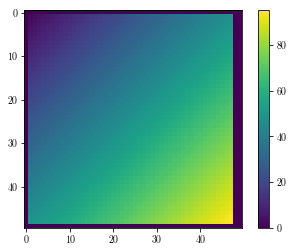

In [122]:
plt.imshow(div_map)
plt.colorbar();

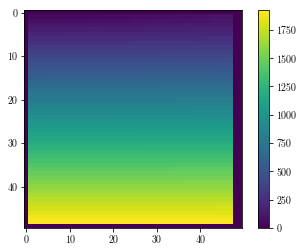

In [123]:
plt.imshow(div_unc_map)
plt.colorbar();